**COVID-19 GLOBAL DATA TRACKER**

This project aims to build a data analysis and reporting notebook (or app) that tracks global COVID-19 trends. The project will analyze cases, deaths, recoveries, and vaccinations across countries and time. The project involves cleaning and processing real-world data, performing exploratory data analysis (EDA), generating insights, and visualizing trends using Python data tools. The final deliverable is a data analysis report with visuals and narrative insights, suitable for presentation or publishing.  

**The Project Objectives include:**  
- Import and clean COVID-19 global data.  
- Analyze time trends (cases, deaths, vaccinations).  
- Compare metrics across countries/regions.  
- Visualize trends with charts and maps.  
- Communicate findings from the data.  


In [2]:
#importing the necessary libraries. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Data Loading and Exploration**

*Goal: Load the dataset and explore its structure.* 

✅ Tasks:

- Loading the data using pandas.read_csv().

- Checking the number of columns: df.columns.

- Previewing the rows in the dataset: df.head().

- Identifying any missing values: df.isnull().sum().

In [3]:
#Loading the csv file into a pandas dataframe.
pd.read_csv("owid-covid-data.csv")
#Checking the columns of the dataframe.
df = pd.read_csv("owid-covid-data.csv")
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [7]:
# Previewing the first few rows of the dataframe to understand its structure.
df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [8]:
#Identify the misssing values in the dataset.
df.isnull().sum()

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

**Data Cleaning**

*Goal: Prepare data for analysis.*

✅ Tasks:

- Filter countries of interest (e.g., Kenya, USA, India).

- Drop rows with missing dates/critical values.

- Convert date column to datetime: pd.to_datetime().

- Handle missing numeric values with fillna() or interpolate()

In [18]:
import pandas as pd

# Load the dataset
df = pd.read_csv("owid-covid-data.csv")

# Define the list of economies of interest
Economies_of_interest = ['Egypt', 'Nigeria', 'South Africa', 'Kenya', 'Algeria']

# Filter the DataFrame for the specified economies. 
df_filtered = df[df['location'].isin(Economies_of_interest)].copy()

# Drop rows with missing dates
df_filtered.dropna(subset=['date'], inplace=True)

# Converting the 'date' column to datetime objects
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Identifying critical numeric columns where missing values might be problematic for analysis
critical_numeric_cols = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths',
                         'total_cases_per_million', 'new_cases_per_million',
                         'total_deaths_per_million', 'new_deaths_per_million',
                        'icu_patients', 'hosp_patients',
                         'total_tests', 'new_tests', 'positive_rate',
                         'total_vaccinations', 'people_vaccinated',
                         'people_fully_vaccinated', 'total_boosters']

# Handling missing values in the critical numeric columns using interpolation (if possible)
for col in critical_numeric_cols:
    if df_filtered[col].isnull().any():
        try:
            df_filtered[col].interpolate(inplace=True, limit_direction='both')
            print(f"Interpolated missing values in: {col}")
        except ValueError:
            print(f"Could not interpolate missing values in: {col}. Consider using fillna().")

# Filling any remaining missing values in critical columns after interpolation with 0 or another appropriate value.
for col in critical_numeric_cols:
    if df_filtered[col].isnull().any():
        df_filtered[col].fillna(0, inplace=True)  # Example: Filling remaining NaNs with 0
        print(f"Filled remaining missing values (after interpolation) in {col} with 0.")

# Display the first few rows of the processed DataFrame
print("\nFirst few rows of the filtered and processed DataFrame:")
print(df_filtered.head(5))

Interpolated missing values in: icu_patients
Interpolated missing values in: hosp_patients
Interpolated missing values in: total_tests
Interpolated missing values in: new_tests
Interpolated missing values in: positive_rate
Interpolated missing values in: total_vaccinations
Interpolated missing values in: people_vaccinated
Interpolated missing values in: people_fully_vaccinated
Interpolated missing values in: total_boosters

First few rows of the filtered and processed DataFrame:
     iso_code continent location       date  total_cases  new_cases  \
5022      DZA    Africa  Algeria 2020-01-05          0.0        0.0   
5023      DZA    Africa  Algeria 2020-01-06          0.0        0.0   
5024      DZA    Africa  Algeria 2020-01-07          0.0        0.0   
5025      DZA    Africa  Algeria 2020-01-08          0.0        0.0   
5026      DZA    Africa  Algeria 2020-01-09          0.0        0.0   

      new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
5022     

C:\Users\Mr_IP\AppData\Local\Temp\ipykernel_12368\3223138823.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered[col].interpolate(inplace=True, limit_direction='both')


**Exploratory Data Analysis (EDA)**

*Goal: Generate descriptive statistics & explore trends.*

Tasks:

- Plot total cases over time for selected countries.

- Plot total deaths over time.

- Compare daily new cases between countries.

- Calculate the death rate: total_deaths / total_cases.

*i. Plotting total Cases over time for the selected African economies.*

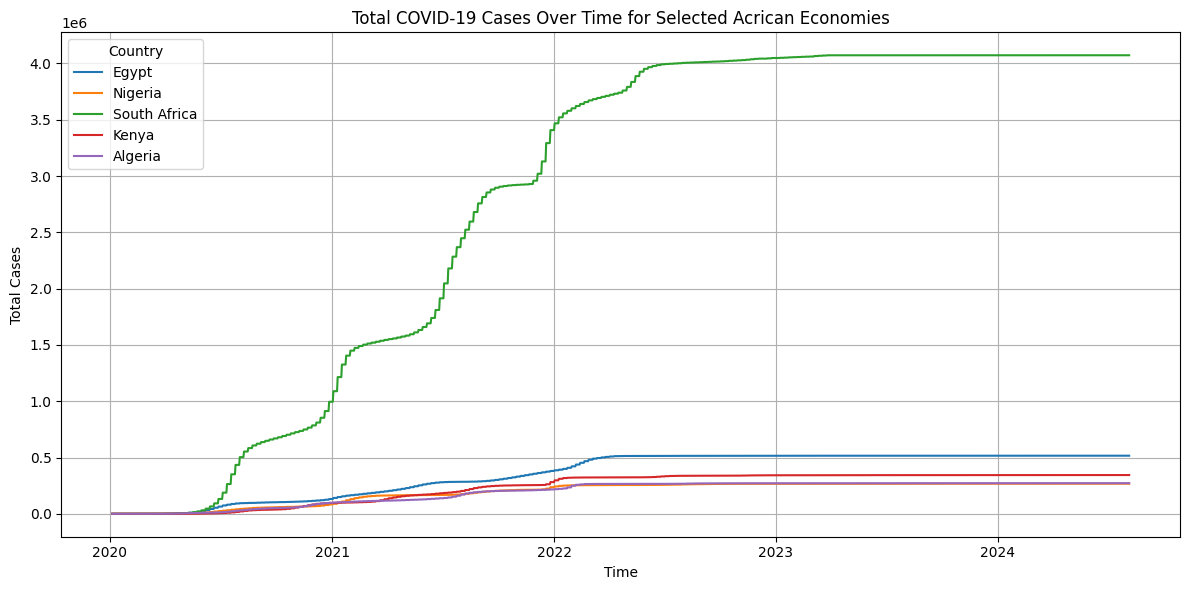

In [26]:
# Create the plot for total cases over time for the selected economies.
plt.figure(figsize=(12, 6))
for country in Economies_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data.index, country_data['total_cases'], label=country)

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases Over Time for Selected Acrican Economies')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

N/B: 
- *The graph shows that South Africa registered the highest number Covid-19 cases for the selected African economies.*
- *There was a surge in cases between 2021 and 2022 for all the economies/countries.*
- *Few Cases were reported after 2024.*

*ii.Plotting the total deaths over time for the selected economies.*

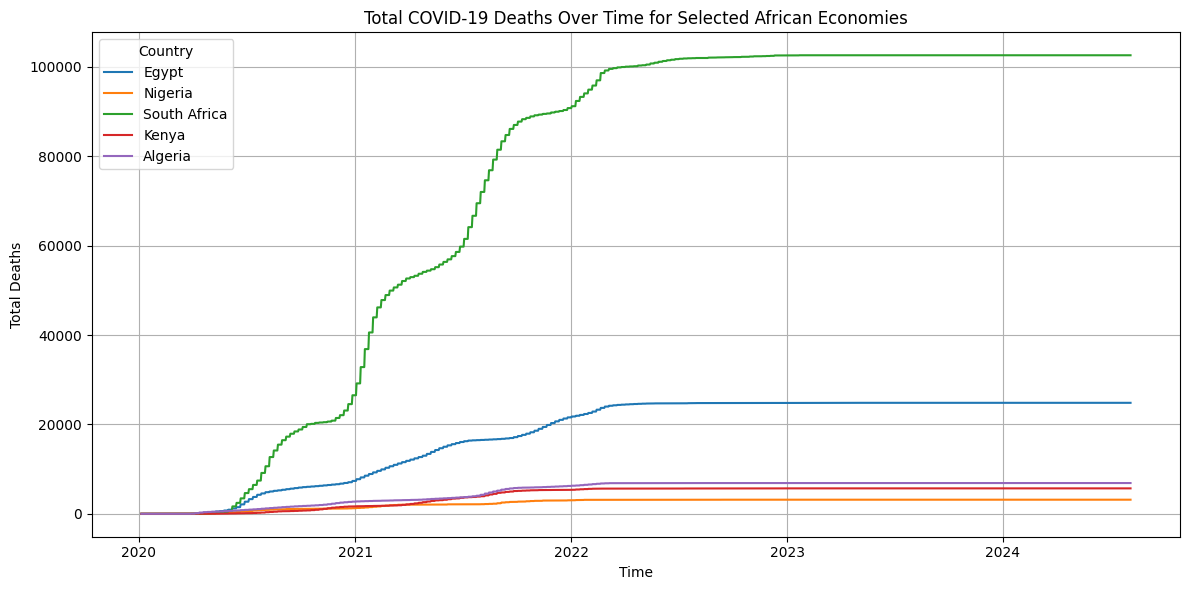

In [28]:
#Plotting the total deaths over time for the selected economies.
plt.figure(figsize=(12, 6))
for country in Economies_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data.index, country_data['total_deaths'], label=country)
# Add labels and title
plt.xlabel('Time')
plt.ylabel('Total Deaths')
plt.title('Total COVID-19 Deaths Over Time for Selected African Economies')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

N/B: The graph shows that South Africa registered the highest number Covid-19 deaths for the selected African economies. 

*iii. Comparing daily new cases between countries*

Total new COVID-19 cases for each selected country:

location
South Africa    4072765.0
Egypt            516023.0
Kenya            344106.0
Algeria          272139.0
Nigeria          267188.0
Name: new_cases, dtype: float64


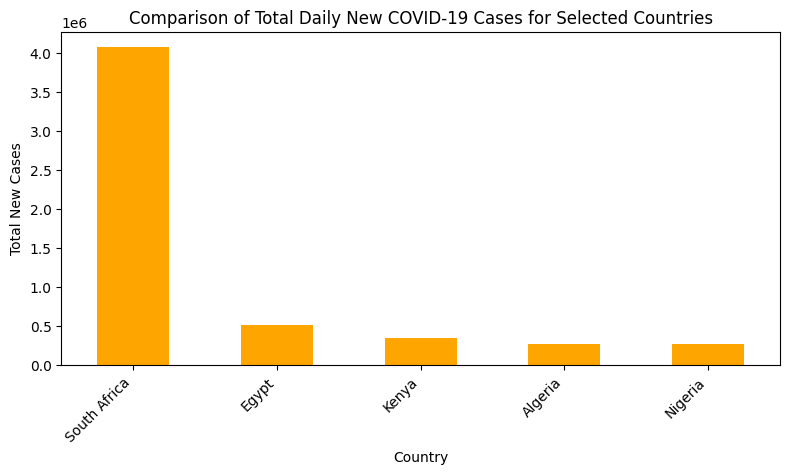

In [34]:
# Group by location and sum the 'new_cases' for each country
total_new_cases_per_country = df_filtered.groupby('location')['new_cases'].sum().sort_values(ascending=False)

print("Total new COVID-19 cases for each selected country:\n")
print(total_new_cases_per_country)

# Create the bar graph
plt.figure(figsize=(8, 5))
total_new_cases_per_country.plot(kind='bar', color='orange')
plt.xlabel('Country')
plt.ylabel('Total New Cases')
plt.title('Comparison of Total Daily New COVID-19 Cases for Selected Countries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- *South Africa registered the highest numbe of daily new cases of Covid-19 for the selected five African economies.*
- *South Africa led the other countries in daily new cases with a bigger margin (Over 4 million cases).*
- *Nigerial had the lowest cumulative daily new cases.*

**Visualising Vaccination Progress.**

*Goal: To Analyze vaccination rollouts.*

Tasks:
- Plot cumulative vaccinations over time for selected countries.

- Compare % vaccinated population.

*i. Cumulative vaccinations over time for selected countries.*

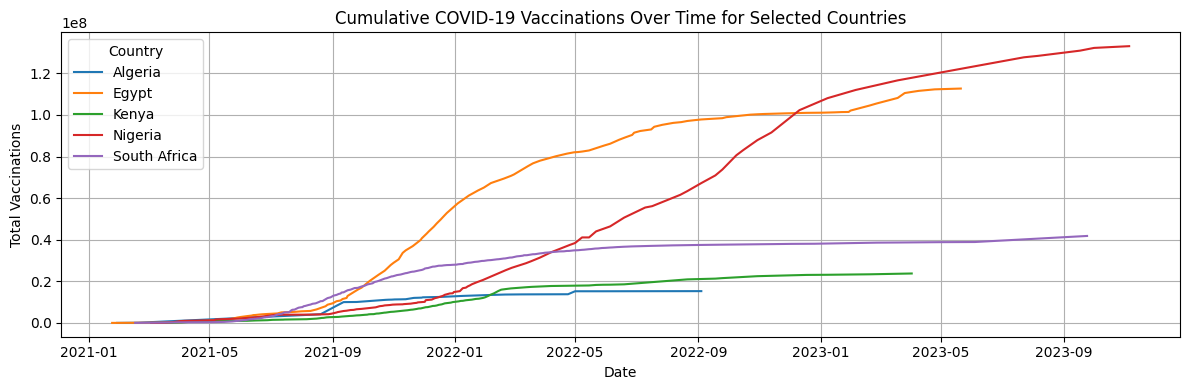

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and filter data (as done before)
df = pd.read_csv("owid-covid-data.csv")
Economies_of_interest = ['Egypt', 'Nigeria', 'South Africa', 'Kenya', 'Algeria']
df_filtered = df[df['location'].isin(Economies_of_interest)].copy()
df_filtered.dropna(subset=['date', 'total_vaccinations'], inplace=True)
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

plt.figure(figsize=(12, 4))
sns.lineplot(data=df_filtered, x='date', y='total_vaccinations', hue='location')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.title('Cumulative COVID-19 Vaccinations Over Time for Selected Countries')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

- *Nigerial leads in the cumulative vaccinations trend and has the highest number of total vaccinations*
- *Egypt comes second*
- *All countries registered a growing trend in totoal vaccinations*


*ii. Comparing Percentage of Vaccinated population in each country.*

To show percentage vaccinated versus unvaccinated people. 

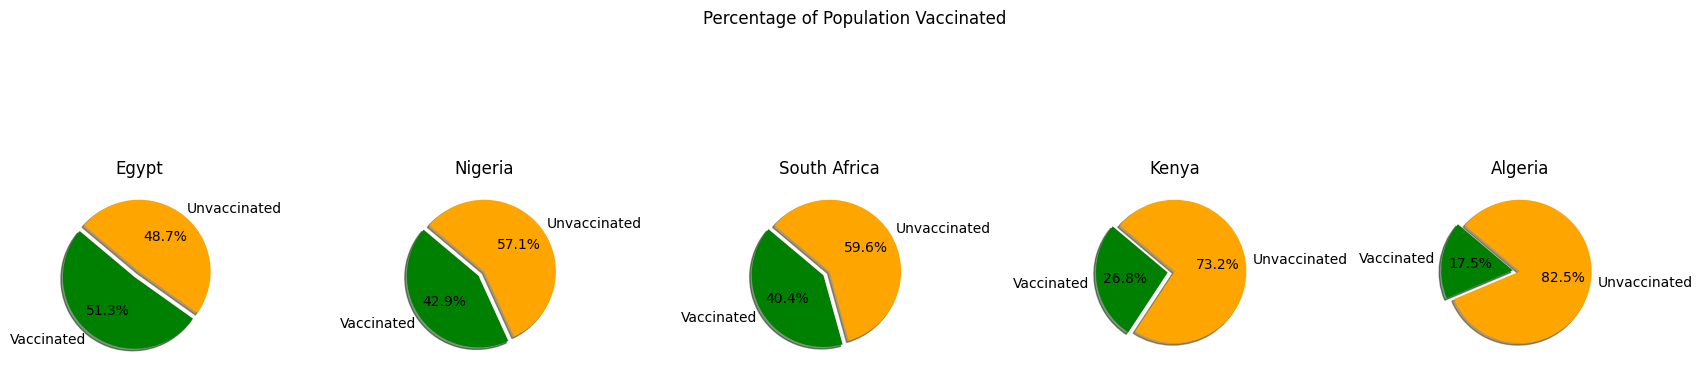

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("owid-covid-data.csv")

# Define the list of countries of interest
Economies_of_interest = ['Egypt', 'Nigeria', 'South Africa', 'Kenya', 'Algeria']

# Filter the DataFrame for the specified countries
df_filtered = df[df['location'].isin(Economies_of_interest)].copy()

# Calculate the percentage of the population vaccinated
df_filtered['vaccinated_percentage'] = (df_filtered['people_vaccinated'] / df_filtered['population']) * 100

# Create pie charts for each country
fig, axs = plt.subplots(1, len(Economies_of_interest), figsize=(17, 5), subplot_kw=dict(aspect="equal"))

# Set the title for the entire figure
fig.suptitle('Percentage of Population Vaccinated')

# Ensure latest_data contains the latest data for each country
latest_data = df_filtered.sort_values('date').groupby('location').last().reset_index()

# Create pie charts for each country
for i, country in enumerate(Economies_of_interest):
    country_data = latest_data[latest_data['location'] == country]
    if not country_data.empty:
        vaccinated_percentage = country_data['vaccinated_percentage'].values[0]
        unvaccinated_percentage = 100 - vaccinated_percentage

        sizes = [vaccinated_percentage, unvaccinated_percentage]
        labels = ['Vaccinated', 'Unvaccinated']
        colors = ['green', 'orange']
        explode = (0.1, 0)  # Exploding the 1st slice (Vaccinated)

        axs[i].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
                 shadow=True, startangle=140)
        axs[i].set_title(country)
    else:
        axs[i].text(0.5, 0.5, 'No Data', horizontalalignment='center', verticalalignment='center')
        axs[i].set_title(country)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusted layout to prevent title overlap
plt.show()

- *Egypt has the largest percentage of its population who have been vaccinated.*
- *The largest percentage of unvaccinated are in Algeria thus poor vaccine uptake.*
- *Just over 50% of the population in Egypt has been vaccinated signifying effective vaccine admninistration.*



**Choropleth Map**

Goal: Visualize cases or vaccination rates by country on a world map using plotly express. 

Tasks:

- Prepare a dataframe with iso_code, total_cases for the latest date.

- Plot a choropleth showing case density or vaccination rates.

In [4]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv("owid-covid-data.csv")

# Filter for the latest date available for each country
latest_date_df = df.groupby('iso_code')['date'].max().reset_index()
latest_data = pd.merge(df, latest_date_df, on=['iso_code', 'date'], how='inner')

# Choropleth map of total cases
fig_cases = px.choropleth(latest_data,
                           locations='iso_code',
                           color='total_cases',
                           hover_name='location',
                           color_continuous_scale=px.colors.sequential.Plasma,
                           title='Total COVID-19 Cases (Latest Data)')
fig_cases.show()

Notes: 
- USA and China Registered the most number of cases globally. 
- Notably, the lowest cases were reported in the African continent.  

**Key Insights**
1. South Africa had the highest cases and deaths among the selected African countries.
2. Most Covid-19 deaths were reported between 2021 and 2023.
3. Rapid vaccinations took place between 2021 and 2023 in all selected top African economies. 
4. Egypt had the best vaccine rollout with just over 50%. 
5. Algeria had the poorest vaccine administration with less than 20% of its population vaccinated for Covid-19.
6. USA and China led globally in the total number of Covid-19 cases.